# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

## Implementation

This is a demonstration of running a Mesa model in an IPython Notebook. The actual model and agent code are implemented in Schelling.py, in the same directory as this notebook. Below, we will import the model class, instantiate it, run it, and plot the time series of the number of happy agents.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from model import SchellingModel
from model2 import SchellingModel_vote

Now we instantiate a model instance: a 10x10 grid, with an 80% change of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [2]:
model = SchellingModel(33, 33, 0.7, 0.5, 5)
model2 = SchellingModel_vote(33, 33, 0.7, 0.5, 5)

print(model2.elections_type0)
print(model2.elections_type1)
print(model2.elections_type_total)
print(model2.type0)
print(model2.type1)

[51, 42, 45, 41, 40, 37, 49, 35, 37]
[51, 50, 40, 53, 46, 38, 33, 45, 34]
[102, 92, 85, 94, 86, 75, 82, 80, 71]
377
390


We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [3]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps) # Show how many steps have actually run

while model2.running and model2.schedule.steps <100:
    model2.step()
print(model2.schedule.steps)

100
100


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [4]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out2 = model2.datacollector.get_model_vars_dataframe()

In [ ]:
len(model_out2.index)
model_out2.iloc[0][1]
model_out2 = model_out2.assign(pi_m0=pd.Series(np.random.randn(len(model_out2.index))).values,
                               pi_m1=pd.Series(np.random.randn(len(model_out2.index))).values,
                               pi_j0=model_out2.location_0,
                               pi_j1=model_out2.location_0,
                               pi_jm0=pd.Series(np.random.randn(len(model_out2.index))).values,
                               pi_jm1=pd.Series(np.random.randn(len(model_out2.index))).values,
                               big_i=pd.Series(np.random.randn(len(model_out2.index))).values,
                               big_e=pd.Series(np.random.randn(len(model_out2.index))).values)

AttributeError: module 'numpy' has no attribute 'range'

In [5]:
model_out2.head()

,elections,happy,location_0,location_1,location_total,total_0,total_1
0,"[0, 1, 1, 1, 0, 1, 1, 0, 1]",218,"[68, 41, 42, 49, 39, 36, 35, 40, 27]","[43, 49, 43, 50, 38, 44, 45, 35, 43]","[111, 90, 85, 99, 77, 80, 80, 75, 70]",377,390
1,"[0, 1, 1, 1, 0, 1, 0, 0, 1]",296,"[70, 32, 35, 45, 60, 24, 43, 43, 25]","[31, 61, 48, 51, 25, 48, 40, 40, 46]","[101, 93, 83, 96, 85, 72, 83, 83, 71]",377,390
2,"[0, 1, 1, 1, 0, 1, 0, 0, 1]",374,"[83, 29, 24, 35, 64, 20, 55, 45, 22]","[25, 60, 66, 53, 30, 64, 25, 26, 41]","[108, 89, 90, 88, 94, 84, 80, 71, 63]",377,390
3,"[0, 1, 1, 1, 0, 1, 0, 0, 1]",435,"[87, 22, 27, 32, 65, 17, 51, 53, 23]","[21, 70, 63, 49, 28, 69, 25, 21, 44]","[108, 92, 90, 81, 93, 86, 76, 74, 67]",377,390
4,"[0, 1, 1, 1, 0, 1, 0, 0, 1]",479,"[93, 19, 25, 25, 73, 5, 63, 61, 13]","[20, 77, 72, 50, 20, 70, 16, 15, 50]","[113, 96, 97, 75, 93, 75, 79, 76, 63]",377,390


In [7]:
for i in range(0, len(model_out2.index)-1):
    model_out2.loc[i,'pi_m0'] =  model_out2.loc[i,'total_0']/(model_out2.loc[i,'total_0'] + model_out2.loc[i,'total_1'])
    model_out2.loc[i,'pi_m1'] = model_out2.loc[i,'total_1']/(model_out2.loc[i,'total_0'] + model_out2.loc[i,'total_1'])
    total_0 = model_out2.loc[i,'total_0']
    location_0 = model_out2.loc[i,'location_0']
    model_out2.at[i, 'pi_j0'] = [x / total_0 for x in location_0]
    print(sum(model_out2.loc[i, 'pi_j0']))
    print(sum(model_out2.loc[i, 'location_0']))
    print(sum(model_out2.loc[i, 'location_1']))
    
model_out2.head()

0.94025974026
362
368
0.942857142857
363
359
0.950649350649
366
353
0.987012987013
380
357
0.984415584416
379
355
0.953246753247
367
355
0.968831168831
373
358
0.974025974026
375
352
0.968831168831
373
353
0.963636363636
371
351
0.966233766234
372
354
0.966233766234
372
360
0.976623376623
376
357
0.974025974026
375
352
0.971428571429
374
353
0.971428571429
374
355
0.976623376623
376
353
0.976623376623
376
361
0.976623376623
376
355
0.979220779221
377
358
0.971428571429
374
360
0.987012987013
380
361
0.979220779221
377
358
0.981818181818
378
361
0.981818181818
378
365
0.971428571429
374
362
0.971428571429
374
361
0.971428571429
374
364
0.974025974026
375
366
0.968831168831
373
363
0.976623376623
376
365
0.974025974026
375
367
0.976623376623
376
367
0.974025974026
375
366
0.974025974026
375
365
0.974025974026
375
366
0.974025974026
375
365
0.974025974026
375
365
0.976623376623
376
365
0.974025974026
375
364
0.976623376623
376
366
0.976623376623
376
366
0.976623376623
376
366
0.9740259740

,happy,location_0,location_1,location_total,total_0,total_1,pi_m0,pi_m1,pi_j0,pi_j1,pi_jm0,pi_jm1,big_i,big_e
0,215,"[33, 50, 44, 32, 34, 46, 36, 45, 42]","[43, 37, 38, 46, 40, 37, 48, 39, 40]","[76, 87, 82, 78, 74, 83, 84, 84, 82]",385,389,0.497416,0.502584,"[0.0857142857143, 0.12987012987, 0.11428571428...","[33, 50, 44, 32, 34, 46, 36, 45, 42]",1.878054,0.134422,0.850978,-1.572580
1,352,"[34, 38, 40, 35, 27, 48, 36, 53, 52]","[50, 44, 35, 47, 42, 33, 48, 26, 34]","[84, 82, 75, 82, 69, 81, 84, 79, 86]",385,389,0.497416,0.502584,"[0.0883116883117, 0.0987012987013, 0.103896103...","[34, 38, 40, 35, 27, 48, 36, 53, 52]",2.260996,1.752292,0.516709,1.652277
2,411,"[27, 34, 34, 32, 27, 50, 45, 61, 56]","[45, 40, 39, 47, 52, 36, 33, 28, 33]","[72, 74, 73, 79, 79, 86, 78, 89, 89]",385,389,0.497416,0.502584,"[0.0701298701299, 0.0883116883117, 0.088311688...","[27, 34, 34, 32, 27, 50, 45, 61, 56]",-0.393045,-0.155618,1.109129,0.276450
3,480,"[32, 30, 53, 28, 14, 56, 44, 65, 58]","[49, 48, 33, 57, 77, 19, 30, 22, 22]","[81, 78, 86, 85, 91, 75, 74, 87, 80]",385,389,0.497416,0.502584,"[0.0831168831169, 0.0779220779221, 0.137662337...","[32, 30, 53, 28, 14, 56, 44, 65, 58]",0.714567,1.807949,2.121618,0.098567
4,530,"[29, 19, 57, 15, 11, 62, 49, 71, 66]","[50, 54, 25, 59, 81, 21, 29, 15, 21]","[79, 73, 82, 74, 92, 83, 78, 86, 87]",385,389,0.497416,0.502584,"[0.0753246753247, 0.0493506493506, 0.148051948...","[29, 19, 57, 15, 11, 62, 49, 71, 66]",1.402368,-0.218765,-1.589850,-0.284925


Finally, we can plot the 'happy' series:

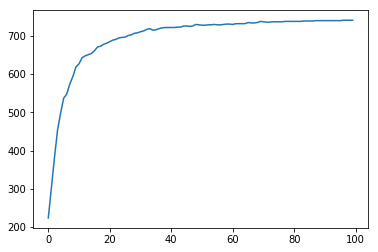

In [43]:
model_out2.happy.plot()

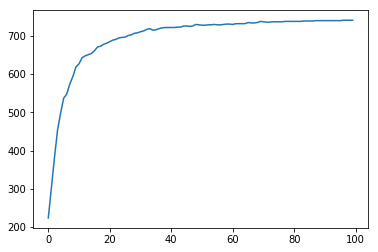

In [44]:
model_out2.happy.plot()

For testing purposes, here is a table giving each agent's x and y values at each step.

In [69]:
x_positions = model2.datacollector.get_model_vars_dataframe()

In [70]:
x_positions.head()

,happy
0,207
1,309
2,394
3,458
4,503


# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [11]:
from mesa.batchrunner import BatchRunner

In [12]:
def get_segregation(model):
    '''
    Find the % of agents that only have neighbors of their same type.
    '''
    segregated_agents = 0
    for agent in model.schedule.agents:
        segregated = True
        for neighbor in model.grid.neighbor_iter(agent.pos):
            if neighbor.type != agent.type:
                segregated = False
                break
        if segregated:
            segregated_agents += 1
    return segregated_agents / model.schedule.get_agent_count()

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [13]:
fixed_params = {"height": 33, "width": 33, "density": 0.8, "minority_pc": 0.5, "homophily": 5} 
variable_parms = {"homophily": 7}

In [14]:
model_reporters = {"Segregated_Agents": get_segregation}

In [15]:
param_sweep = BatchRunner(SchellingModel, 
                          variable_parameters=variable_params, fixed_parameters=fixed_params,
                          iterations=10, 
                          max_steps=200,
                          model_reporters=model_reporters)

param_sweep2 = BatchRunner(SchellingModel_vote,
                          variable_parameters=variable_parms, fixed_parameters=fixed_params,
                          iterations=10, 
                          max_steps=200,
                          model_reporters=model_reporters)

In [16]:
param_sweep.run_all()
param_sweep2.run_all()

80it [00:26,  3.00it/s]
80it [00:23,  3.45it/s]


In [17]:
df = param_sweep.get_model_vars_dataframe()
df2 = param_sweep2.get_model_vars_dataframe()

print(df2)

    homophily  Run  Segregated_Agents
0           1    0           0.011655
1           1    1           0.011655
2           1    2           0.011655
3           1    3           0.011655
4           1    4           0.011655
5           1    5           0.011655
6           1    6           0.011655
7           1    7           0.011655
8           1    8           0.011655
9           1    9           0.011655
10          2   10           0.085847
11          2   11           0.085847
12          2   12           0.085847
13          2   13           0.085847
14          2   14           0.085847
15          2   15           0.085847
16          2   16           0.085847
17          2   17           0.085847
18          2   18           0.085847
19          2   19           0.085847
20          3   20           0.399321
21          3   21           0.399321
22          3   22           0.399321
23          3   23           0.399321
24          3   24           0.399321
25          

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

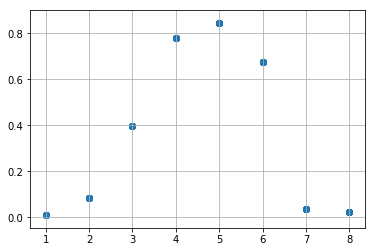

In [18]:
plt.scatter(df2.homophily, df2.Segregated_Agents)
plt.grid(True)

plt.scatter()

# Notation

$J$ - no. of locations  
$j$ - location identifier  
$m$ - group identifier  
$M$ - no. of groups  
$t_{j}$ - no. of people in location i  
$T$ - total number of people  
$\pi_{m}$ - proportion of group m  
$\pi_j$ - proportion of people that belong to some group in location j  
$\pi_{jm}$ - proportion of group m in location i  
$I = \sum_{m = 1}^{M} \pi_m (1 - \pi_m)$ - interaction index  
$E = \sum_{m = 1}^{M} \pi_m ln(\frac{1}{\pi_m})$ - Entropy index  

References for formulas:  
"R&F '02" - Reardon, S. F. and Firebaugh, G. (2002), Measures of Multigroup Segregation. Sociological Methodology, 32: 33–67. doi:10.1111/1467-9531.00110.  
"Census" - https://www.census.gov/hhes/www/housing/resseg/pdf/app_b.pdf

# 1) Dissimilarity Index (multi-group) (R&F '02)

Formula:

$\frac{1}{2} \sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{TI} | \pi_{jm} - \pi_{m} |$

Measures whether individuals tend to live in similar neighborhoods compared to the overall population in the area. Low values correspond to low segregation and vice versa.

# 2) Information theory (multi-group) (R&F '02)

Formula:

$\sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{TE} \pi_{jm} ln \frac{\pi_{jm}}{\pi_{m}}$

Measures whether each region is different from one another. When value is low all regions are similarly distributed, when the value is high, regions have distinct distributions.

# 3) Isolation Index (Census)

Formula for each group m:

$\sum_{j = 1}^{J} \pi_j \pi_{jm}$

Measures the extent to which you are exposed to your own group

# 4) Squared coefficient of variation (multi-group) (R&F '02)

Formula:  
$\sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{T} \frac{(\pi_{jm} - \pi_{m})^{2}}{(M-1)\pi_{m}}$

# 5) Relative diversity (multi-group) (R&F '02)

Formula:  
$\sum_{m = 1}^{M} \sum_{j = 1}^{J} \frac{t_{j}}{TI} (\pi_{jm} - \pi_{m})^{2}$

# Other measures (not based on literature)